In [1]:
n = 6
m = 10
k = 3 # 3-SAT
ret_num = 3

In [2]:
from benchmark.weighted_problem import WeightedProblem
problem = WeightedProblem(n, m, k)

In [3]:
for (c, w) in problem.formula.weighted_clauses:
    print(f'Clause: {c}, weight: {w}')

Clause: (¬x4 ∨ x0 ∨ x2), weight: 5.671181851547063
Clause: (¬x2 ∨ ¬x3 ∨ x3), weight: 1.3739038070044318
Clause: (x1 ∨ ¬x5 ∨ ¬x0), weight: 0.6776034331844683
Clause: (x4 ∨ x5 ∨ ¬x1), weight: 7.547363758255293
Clause: (x0 ∨ x2 ∨ ¬x2), weight: 7.29699744973607
Clause: (x3 ∨ x0 ∨ x2), weight: 2.743216568939445
Clause: (¬x3 ∨ ¬x1 ∨ x0), weight: 3.231723894799694
Clause: (x0 ∨ ¬x4 ∨ ¬x0), weight: 5.31701536333876
Clause: (¬x3 ∨ x5 ∨ ¬x0), weight: 5.76691632601413
Clause: (¬x5 ∨ ¬x3 ∨ x5), weight: 0.8249097670306993


In [4]:
from max_3_sat.quantum_solver import QuantumSolver

quantum_solver = QuantumSolver()
qmax_sats = quantum_solver.max_sat(problem.formula, ret_num=ret_num)


In [5]:
for ass in qmax_sats:
    print(ass)
    print(f'Assignment: {ass}, weight: {problem.formula.assignment_weight(ass)}')

100000
Assignment: 100000, weight: 40.45083221985005
000111
Assignment: 000111, weight: 34.77965036830299
111101
Assignment: 111101, weight: 40.45083221985005


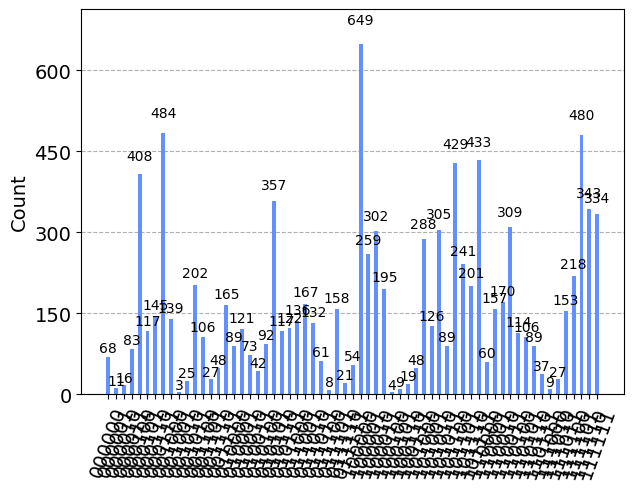

In [6]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(quantum_solver.result)

In [7]:
from pysat.examples.rc2 import RC2

rc2 = RC2(problem.formula.to_pysat())

c_max_sats = []
for i in range(ret_num):
    model = rc2.compute()
    ass = ''.join(['1' if x > 0 else '0' for x in model])
    print(f'Assigment: {ass}, weight: {problem.formula.assignment_weight(ass)}')
    c_max_sats.append(ass)
    rc2.add_clause([-l for l in model])

Assigment: 100000, weight: 40.45083221985005
Assigment: 101000, weight: 40.45083221985005
Assigment: 101010, weight: 40.45083221985005


In [8]:
approx_ratio = problem.formula.assignment_weight(qmax_sats[0]) / problem.formula.assignment_weight(c_max_sats[0])
approx_ratio

1.0